In [118]:
# import packages
import pandas as pd
import numpy as np
import datetime as dt
import scipy.stats as sp
%load_ext google.cloud.bigquery
import pickle
from matplotlib import pyplot as plt
with open('design.pkl','rb') as f:
    set_params = pickle.load(f)
plt.rcParams.update(set_params)

The google.cloud.bigquery extension is already loaded. To reload it, use:
  %reload_ext google.cloud.bigquery


In [119]:
idx = list(range(0, 5))
sales = [75, 80, 75, 85, 80]
mandate = [.22, .28, .33, .38, .52]
df = pd.DataFrame(data={
    'sales': sales,
    'mandate': mandate
}, index=idx)
df['zevm_allowances'] = df.apply(lambda row: (1-row.mandate)*row.sales, axis=1)
df['gap'] = df.apply(lambda row: row.sales - row.zevm_allowances, axis=1)

In [120]:
df

,sales,mandate,zevm_allowances,gap
0,75,0.22,58.50,16.50
1,80,0.28,57.60,22.40
2,75,0.33,50.25,24.75
3,85,0.38,52.70,32.30
4,80,0.52,38.40,41.60


/Users/ben/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  if sys.path[0] == '':


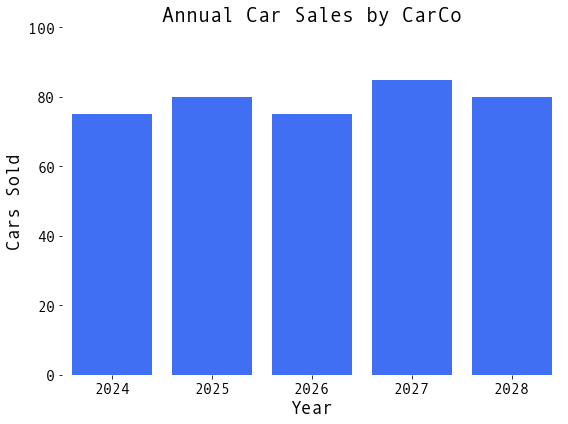

In [121]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.grid(False)

ax.set_ylim(0, 100)
ax.set_xlim(0.5, 5.5)
ax.set_ylabel('Cars Sold')
ax.set_xlabel('Year')

ax.bar(x=df.index+1, height=df.sales)

ax.set_xticklabels(['', '2024', '2025', '2026', '2027', '2028'])

ax.set_title('Annual Car Sales by CarCo')

plt.savefig('plots/car_co_sales.png', transparent=False, bbox_inches='tight', dpi=300)

/Users/ben/opt/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  from ipykernel import kernelapp as app


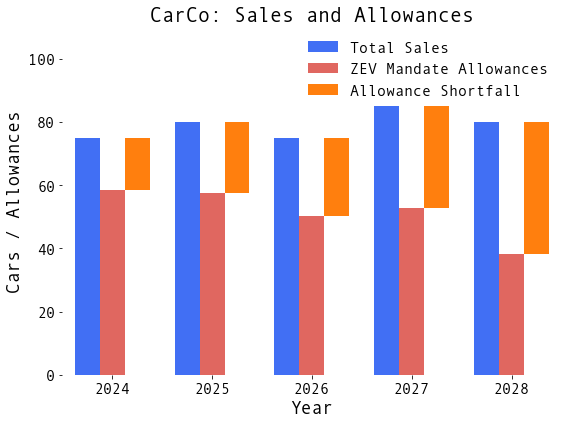

In [122]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.grid(False)

ax.set_ylim(0, 110)
ax.set_xlim(0.5, 5.5)
ax.set_ylabel('Cars / Allowances')
ax.set_xlabel('Year')

ax.bar(x=df.index+.75, height=df.sales, width=0.25, label='Total Sales')
ax.bar(x=df.index+1, height=df.zevm_allowances, width=0.25, label='ZEV Mandate Allowances')
ax.bar(x=df.index+1.25, height=df.gap, bottom=df.zevm_allowances, width=.25, label='Allowance Shortfall')
ax.legend(loc='upper right')

ax.set_xticklabels(['', '2024', '2025', '2026', '2027', '2028'])

ax.set_title('CarCo: Sales and Allowances')
plt.savefig('plots/car_co_zevm.png', transparent=False, bbox_inches='tight', dpi=300)

In [123]:
df['ZEVsales'] = [3, 5, 8, 12, 25]
df['gap_after_sales'] = df.apply(lambda row: row.sales - (row.zevm_allowances + row.ZEVsales), axis=1)

In [124]:
df

,sales,mandate,zevm_allowances,gap,ZEVsales,gap_after_sales
0,75,0.22,58.50,16.50,3,13.50
1,80,0.28,57.60,22.40,5,17.40
2,75,0.33,50.25,24.75,8,16.75
3,85,0.38,52.70,32.30,12,20.30
4,80,0.52,38.40,41.60,25,16.60


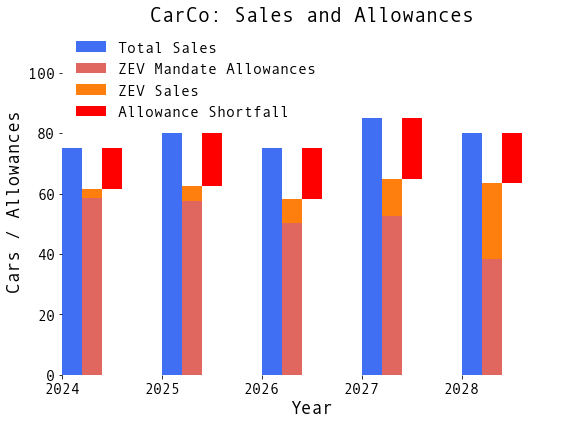

In [125]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.grid(False)

ax.set_ylim(0, 115)
ax.set_xlim(0, 25)
ax.set_ylabel('Cars / Allowances')
ax.set_xlabel('Year')

ax.bar(x=(5*df.index)+.5, height=df.sales, width=1, label='Total Sales')
ax.bar(x=(5*df.index)+1.5, height=df.zevm_allowances, width=1, label='ZEV Mandate Allowances')
ax.bar(x=(5*df.index)+1.5, height=df.ZEVsales, bottom = df.zevm_allowances, width=1, label='ZEV Sales')
ax.bar(x=(5*df.index)+2.5, height=df.gap_after_sales, bottom=(df.zevm_allowances + df.ZEVsales), width=1, label='Allowance Shortfall', color='r')
ax.legend(loc='upper left')

ax.set_xticks(list(range(0, 25, 5)))
ax.set_xticklabels(['2024', '2025', '2026', '2027', '2028'])

ax.set_title('CarCo: Sales and Allowances')
plt.savefig('plots/car_co_zevm_sales.png', transparent=False, bbox_inches='tight', dpi=300)

In [126]:
df['Esales'] = [40, 60, 30, 50, 80]
df['zevEsales'] = [20, 32, 19, 30, 50]
df['Ezevm_allowances'] = df.apply(lambda row: (1-row.mandate) * row.Esales, axis=1)

In [127]:
df['Egap_after_sales'] = df.apply(lambda row: row.Esales - (row.Ezevm_allowances + row.zevEsales), axis=1)

In [128]:
df

,sales,mandate,zevm_allowances,gap,ZEVsales,gap_after_sales,Esales,zevEsales,Ezevm_allowances,Egap_after_sales
0,75,0.22,58.50,16.50,3,13.50,40,20,31.2,-11.2
1,80,0.28,57.60,22.40,5,17.40,60,32,43.2,-15.2
2,75,0.33,50.25,24.75,8,16.75,30,19,20.1,-9.1
3,85,0.38,52.70,32.30,12,20.30,50,30,31.0,-11.0
4,80,0.52,38.40,41.60,25,16.60,80,50,38.4,-8.4


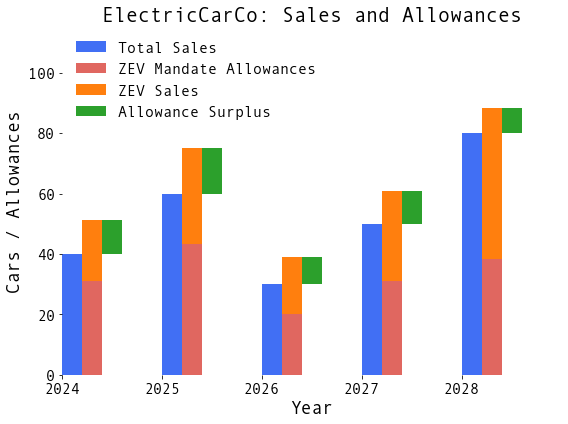

In [129]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.grid(False)

ax.set_ylim(0, 115)
ax.set_xlim(0, 25)
ax.set_ylabel('Cars / Allowances')
ax.set_xlabel('Year')

ax.bar(x=(5*df.index)+.5, height=df.Esales, width=1, label='Total Sales')
ax.bar(x=(5*df.index)+1.5, height=df.Ezevm_allowances, width=1, label='ZEV Mandate Allowances')
ax.bar(x=(5*df.index)+1.5, height=df.zevEsales, bottom = df.Ezevm_allowances, width=1, label='ZEV Sales')
ax.bar(x=(5*df.index)+2.5, height=df.Egap_after_sales, bottom=(df.Ezevm_allowances + df.zevEsales), width=1, label='Allowance Surplus')
ax.legend(loc='upper left')

ax.set_xticks(list(range(0, 25, 5)))
ax.set_xticklabels(['2024', '2025', '2026', '2027', '2028'])

ax.set_title('ElectricCarCo: Sales and Allowances')
plt.savefig('plots/Ecar_co_zevm_sales.png', transparent=False, bbox_inches='tight', dpi=300)

In [130]:
df['gap_after_sales_and_trading'] = df.Egap_after_sales + df.gap_after_sales
df

,sales,mandate,zevm_allowances,gap,ZEVsales,gap_after_sales,Esales,zevEsales,Ezevm_allowances,Egap_after_sales,gap_after_sales_and_trading
0,75,0.22,58.50,16.50,3,13.50,40,20,31.2,-11.2,2.30
1,80,0.28,57.60,22.40,5,17.40,60,32,43.2,-15.2,2.20
2,75,0.33,50.25,24.75,8,16.75,30,19,20.1,-9.1,7.65
3,85,0.38,52.70,32.30,12,20.30,50,30,31.0,-11.0,9.30
4,80,0.52,38.40,41.60,25,16.60,80,50,38.4,-8.4,8.20


In [142]:
running_total = 0
deficit = []
borrowed_allowances = []

for e in df.gap_after_sales_and_trading.tolist()[:3]:
    running_total += e
    
    deficit.append(running_total)
    running_total *= 1.035
    borrowed_allowances.append(e)

running_total *= -1.035
deficit.append(running_total)
deficit.append(0)
borrowed_allowances.append(running_total)
borrowed_allowances.append(0)

df['deficit'] = deficit
df['borrowed_allowances'] = borrowed_allowances
df['gap_after_s_t_b'] = df.apply(lambda row: row.gap_after_sales_and_trading - row.borrowed_allowances, axis=1)

In [143]:
df

,sales,mandate,zevm_allowances,gap,ZEVsales,gap_after_sales,Esales,zevEsales,Ezevm_allowances,Egap_after_sales,gap_after_sales_and_trading,deficit,borrowed_allowances,gap_after_s_t_b
0,75,0.22,58.50,16.50,3,13.50,40,20,31.2,-11.2,2.30,2.300000,2.300000,0.000000
1,80,0.28,57.60,22.40,5,17.40,60,32,43.2,-15.2,2.20,4.580500,2.200000,0.000000
2,75,0.33,50.25,24.75,8,16.75,30,19,20.1,-9.1,7.65,12.390818,7.650000,0.000000
3,85,0.38,52.70,32.30,12,20.30,50,30,31.0,-11.0,9.30,-13.273353,-13.273353,22.573353
4,80,0.52,38.40,41.60,25,16.60,80,50,38.4,-8.4,8.20,0.000000,0.000000,8.200000


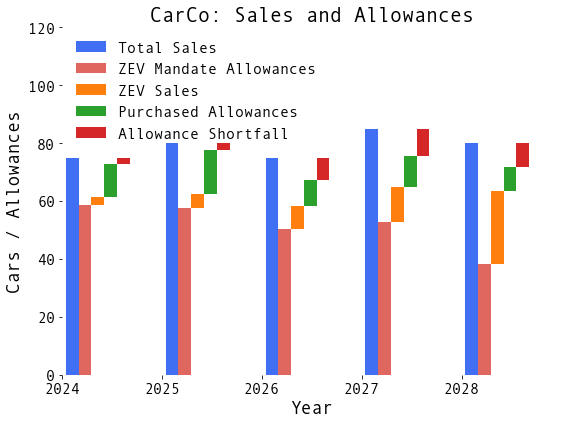

In [144]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.grid(False)

ax.set_ylim(0, 120)
ax.set_xlim(0, 25)
ax.set_ylabel('Cars / Allowances')
ax.set_xlabel('Year')

bar_width = 0.64
bar_gap = 0.0

ax.bar(x=(5*df.index)+0.5, height=df.sales, width=bar_width, label='Total Sales')
ax.bar(x=(5*df.index)+0.5+bar_width+bar_gap, height=df.zevm_allowances, width=bar_width, label='ZEV Mandate Allowances')
ax.bar(x=(5*df.index)+0.5+2*bar_width+2*bar_gap, height=df.ZEVsales, bottom = df.zevm_allowances, width=bar_width, label='ZEV Sales')
ax.bar(x=(5*df.index)+0.5+3*bar_width+2*bar_gap, height=-1*df.Egap_after_sales, bottom=(df.zevm_allowances + df.ZEVsales), width=bar_width, label='Purchased Allowances')
# ax.bar(x=(5*df.index)+0.5+4*bar_width+2*bar_gap, height=df.borrowed_allowances, bottom=(df.zevm_allowances + df.ZEVsales+(-1*df.Egap_after_sales)), width=bar_width, label='Borrowed Allowances')
ax.bar(x=(5*df.index)+0.5+4*bar_width+3*bar_gap, height=df.gap_after_sales_and_trading, bottom=(df.zevm_allowances + df.ZEVsales+(-1*df.Egap_after_sales)), width=bar_width, label='Allowance Shortfall')


ax.legend(loc='upper left')

ax.set_xticks(list(range(0, 25, 5)))
ax.set_xticklabels(['2024', '2025', '2026', '2027', '2028'])

ax.set_title('CarCo: Sales and Allowances')
plt.savefig('plots/car_co_zevm_sales_mad.png', transparent=False, bbox_inches='tight', dpi=300)

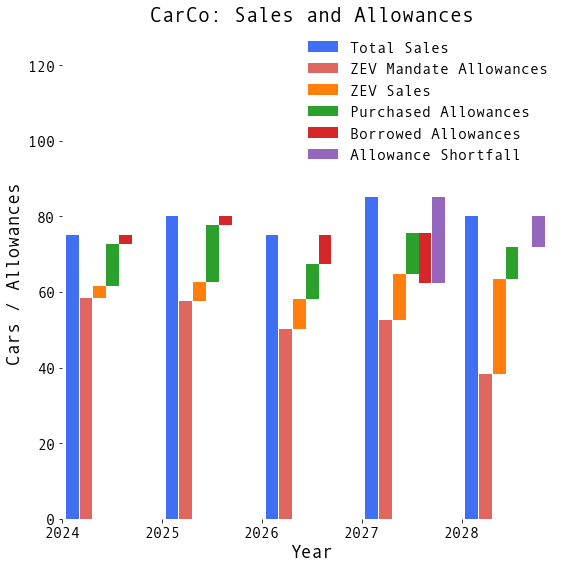

In [147]:
fig, ax = plt.subplots(figsize=(8, 8))

ax.grid(False)

ax.set_ylim(0, 130)
ax.set_xlim(0, 25)
ax.set_ylabel('Cars / Allowances')
ax.set_xlabel('Year')

bar_width = 0.64
bar_gap = 0.05

ax.bar(x=(5*df.index)+0.5, height=df.sales, width=bar_width, label='Total Sales')
ax.bar(x=(5*df.index)+0.5+bar_width+bar_gap, height=df.zevm_allowances, width=bar_width, label='ZEV Mandate Allowances')
ax.bar(x=(5*df.index)+0.5+2*bar_width+2*bar_gap, height=df.ZEVsales, bottom = df.zevm_allowances, width=bar_width, label='ZEV Sales')
ax.bar(x=(5*df.index)+0.5+3*bar_width+2*bar_gap, height=-1*df.Egap_after_sales, bottom=(df.zevm_allowances + df.ZEVsales), width=bar_width, label='Purchased Allowances')
ax.bar(x=(5*df.index)+0.5+4*bar_width+2*bar_gap, height=df.borrowed_allowances, bottom=(df.zevm_allowances + df.ZEVsales+(-1*df.Egap_after_sales)), width=bar_width, label='Borrowed Allowances')
ax.bar(x=(5*df.index)+0.5+5*bar_width+3*bar_gap, height=df.gap_after_s_t_b, bottom=(df.borrowed_allowances+df.zevm_allowances + df.ZEVsales+(-1*df.Egap_after_sales)), width=bar_width, label='Allowance Shortfall')


ax.legend(loc='upper right')

ax.set_xticks(list(range(0, 25, 5)))
ax.set_xticklabels(['2024', '2025', '2026', '2027', '2028'])

ax.set_title('CarCo: Sales and Allowances')
plt.savefig('plots/car_co_zevm_sales_mad.png', transparent=False, bbox_inches='tight', dpi=300)

In [149]:
df['buy_out'] = df.apply(lambda row: row.gap_after_s_t_b * 15000, axis=1)

In [150]:
df

,sales,mandate,zevm_allowances,gap,ZEVsales,gap_after_sales,Esales,zevEsales,Ezevm_allowances,Egap_after_sales,gap_after_sales_and_trading,deficit,borrowed_allowances,gap_after_s_t_b,buy_out
0,75,0.22,58.50,16.50,3,13.50,40,20,31.2,-11.2,2.30,2.300000,2.300000,0.000000,0.000000
1,80,0.28,57.60,22.40,5,17.40,60,32,43.2,-15.2,2.20,4.580500,2.200000,0.000000,0.000000
2,75,0.33,50.25,24.75,8,16.75,30,19,20.1,-9.1,7.65,12.390818,7.650000,0.000000,0.000000
3,85,0.38,52.70,32.30,12,20.30,50,30,31.0,-11.0,9.30,-13.273353,-13.273353,22.573353,338600.302147
4,80,0.52,38.40,41.60,25,16.60,80,50,38.4,-8.4,8.20,0.000000,0.000000,8.200000,123000.000000


In [146]:

print((1.0712249999999999*1.035))

1.1087178749999997
